In [1]:
#Loading the data 

In [2]:
import pandas as pd 
import numpy as np

In [3]:
GND = pd.read_csv('C:\\Users\\ritik\\OneDrive\\Documents\\GitHub\\Multi-Model-Bias-Detection-and-Debiasing-the-News\\Good_News_Dataset\\combined_dataset.csv',delimiter=',')

In [4]:
GND.size

2427576

In [5]:
GND.shape[0]

404596

In [6]:
GND.isna().sum()

image_path         0
caption        34813
article            0
headline           2
article_id         0
image_index        0
dtype: int64

In [7]:
gnd_nona = GND.dropna()

In [8]:
gnd_nona.isna().sum()

image_path     0
caption        0
article        0
headline       0
article_id     0
image_index    0
dtype: int64

Lower Casing the whole dataset 

In [9]:
gnd_nona = gnd_nona.applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\ritik\AppData\Local\Temp\ipykernel_5428\1671697315.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gnd_nona = gnd_nona.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [10]:
gnd_nona['caption'] = gnd_nona['caption'].replace(to_replace=r'[^\w\s]', value='', regex=True)
gnd_nona['article'] = gnd_nona['article'].replace(to_replace=r'[^\w\s]', value='', regex=True)
gnd_nona['headline'] = gnd_nona['headline'].replace(to_replace=r'[^\w\s]', value='', regex=True)


In [11]:
!pip install transformers

In [12]:
gnd_nona.shape[0]

369781

The dataset is quite big and I would need more computing power to just tokenize it . So it is better I take random sample of data from it 

In [13]:
gnd_sampled = gnd_nona.sample(n=100000,random_state=42)

In [14]:
gnd_sampled.shape[0]

100000

In [15]:
gnd_sampled.head()

,image_path,caption,article,headline,article_id,image_index
35099,c:\users\ritik\goodnews\images\5650a72838f0d82...,iraqi security forces training on mosuls outsk...,the attacks in paris last week were a deadly d...,pentagon expands inquiry into intelligence on ...,5650a72838f0d82713feb4ea,1
309071,c:\users\ritik\goodnews\images\55b18b2d38f0d82...,deputy secretary of defense bob work what happ...,washington the pentagon said on thursday that...,procedures faulted in army lab8217s shipment o...,55b18b2d38f0d820636df774,0
45261,c:\users\ritik\goodnews\images\515dadbfcf28d02...,\nafter scrambling on this play brady threw an...,guard logan mankins said ive lost a lot of gam...,drop by welker bradys most reliable receiver h...,515dadbfcf28d0219d002c71,1
44344,c:\users\ritik\goodnews\images\57f7c5ff95d0e02...,work by mark rothko at the portland art museum...,under the heading of localboymakesgood the pai...,mark rothko son of oregon to be honored with m...,57f7c5ff95d0e021d798aafe,1
70416,c:\users\ritik\goodnews\images\5245e3e638f0d81...,\npeople wait in line at the anne frank house\n\n,the train station used to be at the other end ...,the ghosts of amsterdam,5245e3e638f0d8198973d908,5


In [ ]:
import os
from PIL import Image
def remove_corrupted_image(path,dataset):
    path_=path.replace('\\','/')
    try:
        with Image.open(path_) as img:
            img.verify() 
        return False 
    except (IOError, SyntaxError) as e:
        print(f"Removing corrupted image: {path_} - {e}")
        dataset = dataset.drop(dataset[dataset['image_path'] == path].index,inplace=True)
        return True

In [ ]:
gnd_sampled['image_path'].apply(lambda x : remove_corrupted_image(x,gnd_sampled))

Removing corrupted image: c:/users/ritik/goodnews/images/5445644438f0d832c813eb52_0.jpg - cannot identify image file 'C:\\Users\\ritik\\GoodNews\\images\\5445644438f0d832c813eb52_0.jpg'
Removing corrupted image: c:/users/ritik/goodnews/images/5111a5e200315214fbb89668_0.jpg - cannot identify image file 'C:\\Users\\ritik\\GoodNews\\images\\5111a5e200315214fbb89668_0.jpg'
Removing corrupted image: c:/users/ritik/goodnews/images/52b89a3338f0d86bcb2a659a_1.jpg - cannot identify image file 'C:\\Users\\ritik\\GoodNews\\images\\52b89a3338f0d86bcb2a659a_1.jpg'
Removing corrupted image: c:/users/ritik/goodnews/images/56f7bd4938f0d857ea327a1b_0.jpg - cannot identify image file 'C:\\Users\\ritik\\GoodNews\\images\\56f7bd4938f0d857ea327a1b_0.jpg'
Removing corrupted image: c:/users/ritik/goodnews/images/57bb279195d0e021d7981fbb_0.jpg - cannot identify image file 'C:\\Users\\ritik\\GoodNews\\images\\57bb279195d0e021d7981fbb_0.jpg'
Removing corrupted image: c:/users/ritik/goodnews/images/515dafc1cf28d

35099     False
309071    False
45261     False
44344     False
70416     False
          ...  
340840    False
143269    False
123581    False
261036    False
323060    False
Name: image_path, Length: 100000, dtype: bool

In [18]:
gnd_sampled.shape[0]

99386

In [19]:
gnd_sampled = gnd_sampled.reset_index(drop=True)


In [20]:
from transformers import AutoTokenizer

In [21]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [22]:
for col in ['article','caption','headline']:
    gnd_sampled[col+'_tokenized']= gnd_sampled[col].apply(lambda x :tokenizer.tokenize(x, max_length=512,truncation=True,padding=True) )
    gnd_sampled[col+'_tokenized_id']= gnd_sampled[col].apply(lambda x :tokenizer.encode(x, max_length=512,truncation=True,padding=True) )




In [23]:
gnd_sampled.head()

,image_path,caption,article,headline,article_id,image_index,article_tokenized,article_tokenized_id,caption_tokenized,caption_tokenized_id,headline_tokenized,headline_tokenized_id
0,c:\users\ritik\goodnews\images\5650a72838f0d82...,iraqi security forces training on mosuls outsk...,the attacks in paris last week were a deadly d...,pentagon expands inquiry into intelligence on ...,5650a72838f0d82713feb4ea,1,"[the, attacks, in, par, ##is, last, week, were...","[101, 1103, 3690, 1107, 14247, 1548, 1314, 198...","[i, ##ra, ##qi, security, forces, training, on...","[101, 178, 1611, 17276, 2699, 2088, 2013, 1113...","[pen, ##tag, ##on, expands, inquiry, into, int...","[101, 8228, 21365, 1320, 27903, 12064, 1154, 4..."
1,c:\users\ritik\goodnews\images\55b18b2d38f0d82...,deputy secretary of defense bob work what happ...,washington the pentagon said on thursday that...,procedures faulted in army lab8217s shipment o...,55b18b2d38f0d820636df774,0,"[washing, ##ton, the, pen, ##tag, ##on, said, ...","[101, 13445, 1633, 1103, 8228, 21365, 1320, 11...","[deputy, secretary, of, defense, b, ##ob, work...","[101, 5874, 4848, 1104, 3948, 171, 12809, 1250...","[procedures, fault, ##ed, in, army, lab, ##8, ...","[101, 8826, 6088, 1174, 1107, 2306, 8074, 1604..."
2,c:\users\ritik\goodnews\images\515dadbfcf28d02...,\nafter scrambling on this play brady threw an...,guard logan mankins said ive lost a lot of gam...,drop by welker bradys most reliable receiver h...,515dadbfcf28d0219d002c71,1,"[guard, log, ##an, man, ##kins, said, i, ##ve,...","[101, 3542, 9366, 1389, 1299, 9615, 1163, 178,...","[after, s, ##c, ##ram, ##bling, on, this, play...","[101, 1170, 188, 1665, 4515, 6647, 1113, 1142,...","[drop, by, we, ##lk, ##er, bra, ##dy, ##s, mos...","[101, 3968, 1118, 1195, 10493, 1200, 12418, 38..."
3,c:\users\ritik\goodnews\images\57f7c5ff95d0e02...,work by mark rothko at the portland art museum...,under the heading of localboymakesgood the pai...,mark rothko son of oregon to be honored with m...,57f7c5ff95d0e021d798aafe,1,"[under, the, heading, of, local, ##boy, ##ma, ...","[101, 1223, 1103, 5312, 1104, 1469, 9858, 1918...","[work, by, mark, rot, ##h, ##ko, at, the, port...","[101, 1250, 1118, 4551, 24692, 1324, 2718, 112...","[mark, rot, ##h, ##ko, son, of, ore, ##gon, to...","[101, 4551, 24692, 1324, 2718, 1488, 1104, 123..."
4,c:\users\ritik\goodnews\images\5245e3e638f0d81...,\npeople wait in line at the anne frank house\n\n,the train station used to be at the other end ...,the ghosts of amsterdam,5245e3e638f0d8198973d908,5,"[the, train, station, used, to, be, at, the, o...","[101, 1103, 2669, 1466, 1215, 1106, 1129, 1120...","[people, wait, in, line, at, the, an, ##ne, f,...","[101, 1234, 3074, 1107, 1413, 1120, 1103, 1126...","[the, ghosts, of, am, ##ster, ##dam]","[101, 1103, 14586, 1104, 1821, 4648, 10775, 102]"


In [24]:
import cv2
def image_preprocessing(path):
    path = path.replace('\\', '/')
    img = cv2.imread(path)

    resized = cv2.resize(img, (224, 224)).astype(np.float32)
    normalized = resized / 255.0

    mean = np.mean(normalized, axis=(0, 1), keepdims=True)
    std = np.std(normalized, axis=(0, 1), keepdims=True)
    epsilon = 1e-8

    std_img = (normalized - mean) / (std + epsilon)
    return std_img


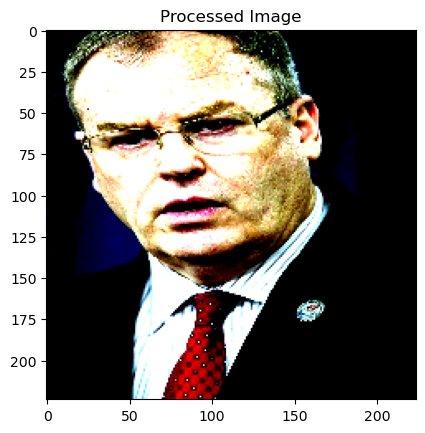

In [25]:
import matplotlib.pyplot as plt
import numpy as np

processed_img = image_preprocessing(gnd_sampled['image_path'][1])

processed_img_display = np.clip((processed_img * 255), 0, 255).astype(np.uint8)

rgb_img = cv2.cvtColor(processed_img_display, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.title("Processed Image")
plt.show()
